In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


### Folders Name inside train dataset

- 0 - Angry
- 1 - Disgust
- 2 - Fear
- 3 - Happy
- 4 - Neutral
- 5 - Sad
- 6 - Surprise"

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

2024-12-04 00:44:31.804648: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733252371.828988   17884 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733252371.836393   17884 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 00:44:31.864172: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Check if GPUs are available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs are available: {[gpu.name for gpu in gpus]}")
else:
    print("No GPUs are available.")




Num GPUs Available:  1
GPUs are available: ['/physical_device:GPU:0']


In [3]:
img_array = cv2.imread("Image_Dataset/train/0/Training_3908.jpg")

In [4]:
img_array.shape # rgb

(48, 48, 3)

- when you load an image in OpenCV using cv2.imread(), the color channels are stored in BGR order, not RGB.

In [20]:
print(img_array)

[[[ 33  33  33]
  [ 36  36  36]
  [ 30  30  30]
  ...
  [ 30  30  30]
  [ 38  38  38]
  [ 59  59  59]]

 [[ 31  31  31]
  [ 29  29  29]
  [ 37  37  37]
  ...
  [ 26  26  26]
  [ 34  34  34]
  [ 47  47  47]]

 [[ 48  48  48]
  [ 51  51  51]
  [ 53  53  53]
  ...
  [ 28  28  28]
  [ 34  34  34]
  [ 41  41  41]]

 ...

 [[209 209 209]
  [191 191 191]
  [197 197 197]
  ...
  [149 149 149]
  [154 154 154]
  [177 177 177]]

 [[212 212 212]
  [192 192 192]
  [190 190 190]
  ...
  [151 151 151]
  [153 153 153]
  [169 169 169]]

 [[214 214 214]
  [201 201 201]
  [189 189 189]
  ...
  [150 150 150]
  [153 153 153]
  [160 160 160]]]


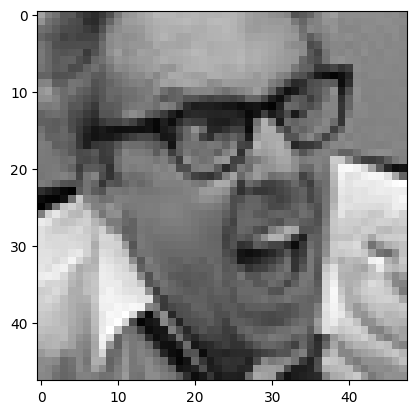

In [5]:
plt.imshow(img_array) # brg

In [6]:
data_directory = "Image_Dataset/train/" # Training Dataset

In [7]:
classes = ['0','1','2','3','4','5','6'] # list of classes [exact names of folders inside train folder]

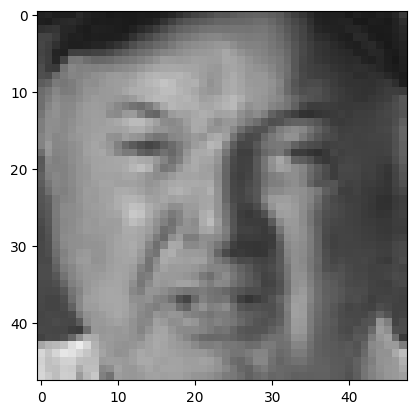

In [8]:
for category in classes: 
    '''The classes variable is expected to be a 
list or iterable containing category names (['0', '1', '2','3','4','5','6']). 
This loop iterates over each class in the dataset.'''
    
    path = os.path.join(data_directory, category) 
    '''Combines the base directory (data_directory) 
    with the current category name (category) to create a full path to that category's folder.'''
    
    for img in os.listdir(path): 
        '''Lists all image files in the path directory (the category folder).
    This loop will iterate over the filenames of images in the category folder.'''
         
        img_array = cv2.imread(os.path.join(path,img)) 
        '''Reads the image using cv2.imread() at the path
        formed by joining path and img. The result is stored in img_array, 
        which will be a NumPy array representing the image.'''

        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)) 
        '''cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) converts the image
        from BGR (OpenCV default) to RGB (common for displaying images in libraries like Matplotlib).
        plt.imshow() is used to display the image using Matplotlib.'''

        plt.show() 
        '''This command displays the image using Matplotlib’s default viewer.
                      The image will appear in a pop-up window.'''
        
        break 
        '''The first break is inside the image loop. It breaks out of the 
                 inner loop after displaying justone image from the path directory.
                 
                 The second break is inside the category loop. It breaks out of the outer 
                 loop after processing just one image from the first category, meaning only one image
                 from the first category will be displayed.
'''
    break

### Changing image size

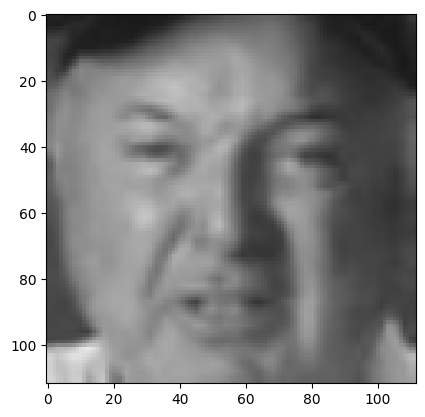

In [9]:
img_size = 112 # New image size (224 X 224)

# Resize the image
new_array = cv2.resize(img_array, (img_size,img_size)) # resizing image to ( 224 X 224)

# Convert BGR to RGB for displaying with matplotlib
plt.imshow(cv2.cvtColor(new_array, (cv2.COLOR_BGR2RGB)))

# show the image
plt.show()

In [10]:
new_array.shape 

(112, 112, 3)

- `224 (Height)`: The number of pixels along the vertical axis (image height).
- `224 (Width)`: The number of pixels along the horizontal axis (image width).
- `3 (Channels)`: The number of color channels. In the case of color images:
    - 3 channels represent the `Red, Green, and Blue` channels in the RGB color space.


## Read all images and convert them to an array

In [11]:
training_data = [] #data array

valid_extensions = ('.jpg', '.jpeg', '.png')

def creating_training_data():

    for category in classes:
        path = os.path.join(data_directory, category) 
        class_num = classes.index(category) # 0,1,2,3,4,5,6
        

        for img in os.listdir(path): 
            
            if img.startswith('.ipynb'):  # Skip hidden files
                print(f"Skipping hidden file: {img}")
                continue
             
            if not img.endswith(valid_extensions):   # Check for valid extensions
                 print(f"Skipping non-image file: {img}")
                 continue
            
            try:
                img_array = cv2.imread(os.path.join(path,img)) 
                '''cv2.imread() reads the image file into an array 
                (a NumPy array representing the image’s pixel values).
                os.path.join(path, img) constructs the full path to the image file.'''
                
                if img_array is None:
                    print(f"Image {img} could not be read. Skipping.")
                    continue
                # Resize the image
                new_array = cv2.resize(img_array, (img_size,img_size)) # resizing image to ( 224 X 224)
                training_data.append([new_array,class_num])
                '''Appends a list containing the processed image (new_array) and 
                its corresponding class label (class_num) to training_data.'''
               
            except Exception as e:
                print(f"Error processing image {img}: {e}")
        

In [12]:
creating_training_data()

In [13]:
print(len(training_data))

28709


In [14]:
new_array.shape

(112, 112, 3)

In [15]:
import random

random.shuffle(training_data)

- Shuffling `training_data` randomly because we don't want our model to learn sequencially but learn dynamically and making training dataset robust .

In [16]:
batch_size = 5000  # Adjust based on system capacity
for i in range(0, len(training_data), batch_size):
    batch = training_data[i:i + batch_size]
    
    # Create NumPy arrays for the batch
    X = np.array([data[0] for data in batch])  # Extract image arrays
    y = np.array([data[1] for data in batch])  # Extract class labels
    
    # Reshape X into a 4D array with dimensions (-1, img_size, img_size, 3)
    X = X.reshape(-1, img_size, img_size, 3)
    
    print(f"Batch {i // batch_size + 1}: X shape: {X.shape}, y shape: {y.shape}") # Converting it into 4th dimension.


Batch 1: X shape: (5000, 112, 112, 3), y shape: (5000,)
Batch 2: X shape: (5000, 112, 112, 3), y shape: (5000,)
Batch 3: X shape: (5000, 112, 112, 3), y shape: (5000,)
Batch 4: X shape: (5000, 112, 112, 3), y shape: (5000,)
Batch 5: X shape: (5000, 112, 112, 3), y shape: (5000,)
Batch 6: X shape: (3709, 112, 112, 3), y shape: (3709,)


In [17]:
X.shape 

(3709, 112, 112, 3)

## Normalization

In [18]:
X = X/255.0  #Normalizing pixel value

In [19]:
print(f"Min pixel value: {X.min()}, Max pixel value: {X.max()}")


Min pixel value: 0.0, Max pixel value: 1.0


In [21]:
y.shape

(3709,)

In [22]:
y[0] # We shuffle labels randomly so output can come random 0 - 6

np.int64(3)

## Deep learning models for training - Transfer Learning